# <u> VIRAL PNEUMONIA AND COVID DETECTION FROM  CHEST RADIOGRAPHY IMAGES </u>



In [2]:
# to ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

In [3]:
# libraries for files preparation
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import shutil

# libraries for CNN models and plotting
import tensorflow as tf
import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# install openpyxl to read excel files
!pip install openpyxl

In [4]:
import openpyxl
import pandas as pd


In [5]:
covid = pd.read_excel('covid-19_Radiography_Dataset/COVID.metadata.xlsx')
covid.head()

,FILE NAME,FORMAT,SIZE
0,COVID-1,PNG,256*256
1,COVID-2,PNG,256*256
2,COVID-3,PNG,256*256
3,COVID-4,PNG,256*256
4,COVID-5,PNG,256*256


In [6]:
normal = pd.read_excel('covid-19_Radiography_Dataset/Normal.metadata.xlsx')
normal.head()

,FILE NAME,FORMAT,SIZE
0,NORMAL-1,PNG,256*256
1,NORMAL-2,PNG,256*256
2,NORMAL-3,PNG,256*256
3,NORMAL-4,PNG,256*256
4,NORMAL-5,PNG,256*256


In [7]:
viral_pneumonia = pd.read_excel('covid-19_Radiography_Dataset/Viral Pneumonia.metadata.xlsx')
viral_pneumonia.head()

,FILE NAME,FORMAT,SIZE
0,Viral Pneumonia-1,PNG,256*256
1,Viral Pneumonia-2,PNG,256*256
2,Viral Pneumonia-3,PNG,256*256
3,Viral Pneumonia-4,PNG,256*256
4,Viral Pneumonia-5,PNG,256*256


In [8]:
# Check the numbers of each cases
print("Covid cases: ", str(len(covid)))
print("Normal cases: ", str(len(normal)))
print("Viral Pneumonia cases: ", str(len(viral_pneumonia)))

Covid cases:  3616
Normal cases:  10192
Viral Pneumonia cases:  1345


In [9]:
# The least number of each class is 1345. Therefore, set the sample size to 1345 samples.
SAMPLE_SIZE = 1345

In [10]:
# add label for each case
covid['label'] = 0
normal['label'] = 1
viral_pneumonia['label'] = 2

In [11]:
# drop non-related columns
covid = covid[['FILE NAME', 'label']]
normal = normal[['FILE NAME', 'label']]
viral_pneumonia = viral_pneumonia[['FILE NAME', 'label']]

In [13]:
# covid dataframe
covid.head()

,FILE NAME,label
0,COVID-1,0
1,COVID-2,0
2,COVID-3,0
3,COVID-4,0
4,COVID-5,0


In [13]:
# sampling data for covid and normal cases
df_0 = covid.sample(SAMPLE_SIZE, random_state=26)
df_1 = normal.sample(SAMPLE_SIZE, random_state=26)

# concat dataframes
data = pd.concat([df_0, df_1, viral_pneumonia], axis=0).reset_index(drop=True)

# check numbers of each label
data['label'].value_counts()

0    1345
1    1345
2    1345
Name: label, dtype: int64

In [14]:
# shuffle data
data = shuffle(data)
data.head()

,FILE NAME,label
93,COVID-2131,0
3284,Viral Pneumonia-595,2
3147,Viral Pneumonia-458,2
1574,NORMAL-9155,1
1598,NORMAL-7949,1


In [15]:
df_train, df_val = train_test_split(data, test_size=0.20, random_state=26, stratify=data['label'])

print(df_train.shape)
print(df_val.shape)

(3228, 2)
(807, 2)


In [16]:
df_train['label'].value_counts()

1    1076
2    1076
0    1076
Name: label, dtype: int64

In [18]:
df_val['label'].value_counts()

1    269
2    269
0    269
Name: label, dtype: int64

In [17]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

In [19]:
# Create a new directory
base_dir = 'base_dir'
os.mkdir(base_dir)


# create 2 folders inside 'base_dir':
# base_dir
  ## train_dir
     ### covid
     ### normal
     ### viral_pneumonia
  ## val_dir
     ### covid
     ### normal
     ### viral_pneumonia

# create a path to 'base_dir' to which we will join the names of the new folders
# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# [CREATE FOLDERS INSIDE THE TRAIN AND VALIDATION FOLDERS]
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
train_covid = os.path.join(train_dir, 'covid')
os.mkdir(train_covid)
train_normal = os.path.join(train_dir, 'normal')
os.mkdir(train_normal)
train_viral_pneumonia = os.path.join(train_dir, 'viral pneumonia')
os.mkdir(train_viral_pneumonia)

# create new folders inside val_dir
val_covid = os.path.join(val_dir, 'covid')
os.mkdir(val_covid)
val_normal = os.path.join(val_dir, 'normal')
os.mkdir(val_normal)
val_viral_pneumonia = os.path.join(val_dir, 'viral pneumonia')
os.mkdir(val_viral_pneumonia)

In [20]:
# check the folders in train_dir
os.listdir('base_dir/train_dir')

['viral pneumonia', 'normal', 'covid']

# Transforming images into folders

In [22]:
train_list = list(df_train['FILE NAME'])
val_list = list(df_val['FILE NAME'])

In [23]:
# Copy images to train_dir folder
for image in train_list:
    
    # add .png extension 
    filename = image + '.png'
    # get the label for a certain image
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)
    
    # match the target with the folder's name and source path of the image
    if target == 0:
        label = 'covid'
        src = os.path.join('covid-19_Radiography_Dataset/COVID', filename)
        
    if target == 1:
        label = 'normal'
        # As 'FILE NAME's in .xlsx file begins with 'NORMAL' but real file names begin with 'Normal'
        filename = filename.capitalize()
        src = os.path.join('covid-19_Radiography_Dataset/Normal', filename)
        
    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('covid-19_Radiography_Dataset/Viral Pneumonia', filename)
  
    # destination path to image
    dst = os.path.join(train_dir, label, filename)
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

# Copy images to val_dir folder
for image in val_list:
    
    # add .png extension 
    filename = image + '.png'
    # get the label for a certain image
    target = int(data.loc[data['FILE NAME'] == image, ['label']].values)
    
    # match the target with the folder's name and source path of the image
    if target == 0:
        label = 'covid'
        src = os.path.join('covid-19_Radiography_Dataset/COVID', filename)
        
    if target == 1:
        label = 'normal'
        filename = filename.capitalize()
        src = os.path.join('covid-19_Radiography_Dataset/Normal', filename)
        
    if target == 2:
        label = 'viral pneumonia'
        src = os.path.join('covid-19_Radiography_Dataset/Viral Pneumonia', filename)
  
    # destination path to image
    dst = os.path.join(val_dir, label, filename)
    
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [24]:
# check the number of train images in each folder
print(len(os.listdir('base_dir/train_dir/covid')))
print(len(os.listdir('base_dir/train_dir/normal')))
print(len(os.listdir('base_dir/train_dir/viral pneumonia')))

1076
1076
1076


In [25]:
# check the number of validation images in each folder
print(len(os.listdir('base_dir/val_dir/covid')))
print(len(os.listdir('base_dir/val_dir/normal')))
print(len(os.listdir('base_dir/val_dir/viral pneumonia')))

269
269
269


# Image classification

In [26]:
BATCH_SIZE = 32
IMG_SIZE = (256  , 256)
train_directory = "base_dir/train_dir"
val_directory = "base_dir/val_dir"
                                 

# Generate Train/Val Dataset

In [27]:
train_datagen = ImageDataGenerator(rescale=1./255,
        rotation_range=0.2,
        shear_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        val_directory,
        target_size=IMG_SIZE,
        color_mode='grayscale',
        batch_size=32,
        shuffle=False,
        class_mode='categorical')

Found 3228 images belonging to 3 classes.
Found 807 images belonging to 3 classes.


In [28]:
# check classes in train_generator
train_generator.class_indices

{'covid': 0, 'normal': 1, 'viral pneumonia': 2}

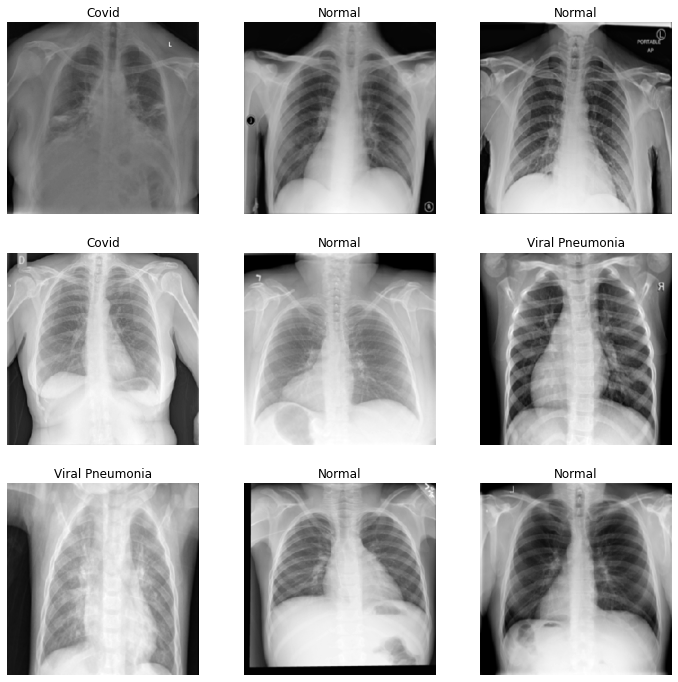

In [29]:
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3,3, i+1)
    img, label = train_generator.next()
    plt.imshow(img[0], cmap='gray')
    dic = {0:'Covid', 1:'Normal', 2:'Viral Pneumonia'}
    plt.title(dic.get(np.where(label[0]==1)[0][0]))
    plt.axis('off')
plt.show()

# Manual CNN
## The model architecture is based on VGG-19 model, including 3x3 filter for convolutions layer and 2x2 filter for pooling layers, doubling the number of filters and three fully-connected layers.

In [30]:
def covid_model1(IMG_SIZE):
    input_shape = IMG_SIZE + (1, )
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", padding='same',input_shape=input_shape),
        MaxPooling2D(pool_size = (2, 2)), 
        Conv2D(32, (3, 3), padding='same', activation="relu"),
        MaxPooling2D(pool_size = (2, 2)), 
        Conv2D(64, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(64, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(128, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Conv2D(256, (3, 3), padding='same',activation="relu"),
        MaxPooling2D(pool_size = (2, 2)),
        Flatten(),
       
        Dense(units=128, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=3, activation='softmax')
    ])
    return model

In [31]:
# recheck the image size
IMG_SIZE

(256, 256)

In [32]:
model1 = covid_model1(IMG_SIZE)

2022-04-12 19:14:23.238591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-12 19:14:23.238732: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [33]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

In [34]:
base_learning_rate = 0.001
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [35]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [36]:
initial_epochs = 15
history = model1.fit(train_generator, epochs=initial_epochs, 
                     validation_data = validation_generator, callbacks=[early_stopping])

Epoch 1/15


2022-04-12 19:14:41.258911: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-12 19:14:41.556500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - ETA: 0s - loss: 0.7968 - accuracy: 0.5886

2022-04-12 19:14:56.832993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


101/101 [==============================] - 17s 130ms/step - loss: 0.7968 - accuracy: 0.5886 - val_loss: 0.5833 - val_accuracy: 0.7187
Epoch 2/15
101/101 [==============================] - 12s 120ms/step - loss: 0.5511 - accuracy: 0.7543 - val_loss: 0.5073 - val_accuracy: 0.7819
Epoch 3/15
101/101 [==============================] - 12s 116ms/step - loss: 0.5100 - accuracy: 0.7794 - val_loss: 0.5063 - val_accuracy: 0.7732
Epoch 4/15
101/101 [==============================] - 12s 118ms/step - loss: 0.4518 - accuracy: 0.8048 - val_loss: 0.4164 - val_accuracy: 0.8191
Epoch 5/15
101/101 [==============================] - 12s 115ms/step - loss: 0.3712 - accuracy: 0.8494 - val_loss: 0.4646 - val_accuracy: 0.7856
Epoch 6/15
101/101 [==============================] - 12s 119ms/step - loss: 0.3241 - accuracy: 0.8758 - val_loss: 0.2966 - val_accuracy: 0.8748
Epoch 7/15
101/101 [==============================] - 12s 118ms/step - loss: 0.2599 - accuracy: 0.8944 - val_loss: 0.2798 - val_accuracy: 0.8

In [37]:
# Evaluate the model by getting its final loss and accuracy
model1.evaluate(validation_generator)

26/26 [==============================] - 2s 54ms/step - loss: 0.2327 - accuracy: 0.9182


[0.23274263739585876, 0.9182156324386597]

# Accuracy on Manual CNN is 93.06%

In [38]:
# create history loss and accuracy function
def plot_loss_acc(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(train_loss))

    plt.figure(figsize=(8,6))
    plt.plot(epochs, train_loss, color='b', label='Train')
    plt.plot(epochs, val_loss, color='r', label='Validation')
    plt.legend()
    plt.title('Model Loss')
    
    
    plt.figure(figsize=(8,6))
    plt.plot(epochs, acc, color='b', label='Train')
    plt.plot(epochs, val_acc, color='r', label='Validation')
    plt.legend()
    plt.title('Model Accuracy')
    
    plt.show()

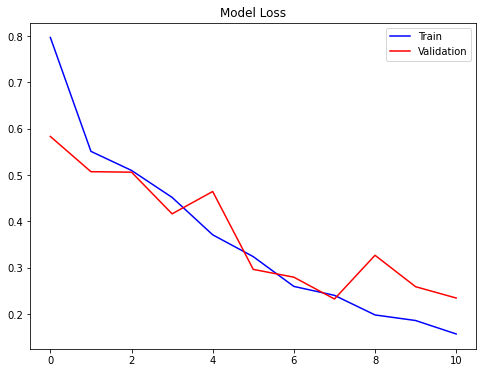

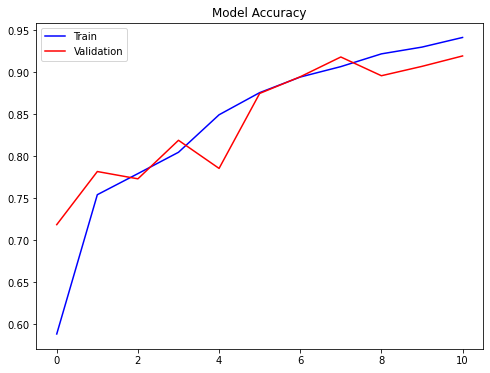

In [39]:
plot_loss_acc(history)

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [41]:
# predict classes of validation dataset
val_predict = model1.predict(validation_generator)

2022-04-12 19:19:39.109557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [42]:
predict_class = np.argmax(val_predict, axis=1)
predict_class = predict_class.tolist()

In [43]:
labels = ['Covid', 'Normal', 'Viral Pneumonia']
report = classification_report(validation_generator.classes, predict_class, target_names=labels)
print(report)

                 precision    recall  f1-score   support

          Covid       0.90      0.87      0.89       269
         Normal       0.88      0.90      0.89       269
Viral Pneumonia       0.97      0.98      0.97       269

       accuracy                           0.92       807
      macro avg       0.92      0.92      0.92       807
   weighted avg       0.92      0.92      0.92       807



In [44]:
cm = confusion_matrix(validation_generator.classes, predict_class)
cm_df = pd.DataFrame(cm,
                     index = ['COVID','NORMAL','VIRAL PNEUMONIA'], 
                     columns = ['COVID','NORMAL','VIRAL PNEUMONIA'])

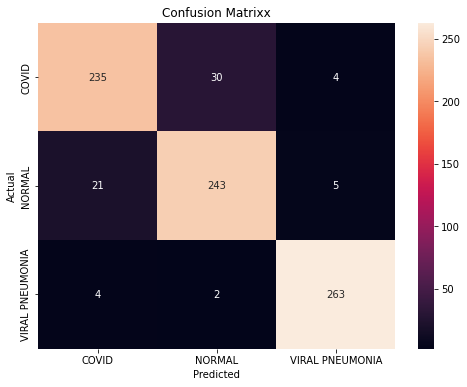

In [45]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d')
plt.title("Confusion Matrixx")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Tranfer Learning using VGG16

In [46]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D


In [47]:
ROOT_DIR = "COVID-19_Radiography_Dataset/"
imgs = ['COVID','Lung_Opacity','Normal','Viral Pneumonia']

NEW_DIR = "all_images/"

In [48]:
if not os.path.exists(NEW_DIR):
  os.mkdir(NEW_DIR)

  for i in imgs:
    org_dir = os.path.join(ROOT_DIR, i+"/")
    
    for imgfile in glob.iglob(os.path.join(org_dir, "*.png")):
      shutil.copy(imgfile, NEW_DIR)
      
else:
  print("Already Exist")

Already Exist


In [49]:
counter = {'COVID':0,'Lung_Opacity':0,'Normal':0,'Viral Pneumonia':0}

for image in imgs:
  for count in glob.iglob(NEW_DIR+image+"*"):
    counter[image] += 1

counter

{'COVID': 8, 'Lung_Opacity': 6012, 'Normal': 5492, 'Viral Pneumonia': 45}

In [50]:
if not os.path.exists(NEW_DIR+"train_test_split/"):

  os.makedirs(NEW_DIR+"train_test_split/")

  os.makedirs(NEW_DIR+"train_test_split/train/Normal")
  os.makedirs(NEW_DIR+"train_test_split/train/Covid")

  os.makedirs(NEW_DIR+"train_test_split/test/Normal")
  os.makedirs(NEW_DIR+"train_test_split/test/Covid")

  os.makedirs(NEW_DIR+"train_test_split/validation/Normal")
  os.makedirs(NEW_DIR+"train_test_split/validation/Covid")


  # Train Data
  for i in np.random.choice(replace= False , size= 3000 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 3900 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 900 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/train/Covid" )
    os.remove(i)

  # Validation Data
  for i in np.random.choice(replace= False , size= 308 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 500 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/validation/Covid" )
    os.remove(i)

  # Test Data
  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[0]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 300 , a = glob.glob(NEW_DIR+imgs[2]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Normal" )
    os.remove(i)

  for i in np.random.choice(replace= False , size= 200 , a = glob.glob(NEW_DIR+imgs[3]+"*") ):
    shutil.copy(i , NEW_DIR+"train_test_split/test/Covid" )
    os.remove(i)

In [51]:
train_path  = "all_images/train_test_split/train"
valid_path  = "all_images/train_test_split/validation"
test_path   = "all_images/train_test_split/test"

In [52]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import vgg16
from keras.models import Model
from keras.layers import Dense, MaxPool2D, Conv2D


In [53]:
train_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory= train_path , target_size=(224,224))

Found 7800 images belonging to 2 classes.


In [54]:
validation_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input , rescale= 1./255 )
valid = validation_data_gen.flow_from_directory(directory= valid_path , target_size=(224,224))

Found 1008 images belonging to 2 classes.


In [55]:
test_data_gen = ImageDataGenerator(preprocessing_function= vgg16.preprocess_input, rescale= 1./255 )
test = train_data_gen.flow_from_directory(directory= test_path , target_size=(224,224), shuffle= False)

Found 800 images belonging to 2 classes.


In [56]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [57]:
class_type = {0:'Covid',  1 : 'Normal'}

In [58]:
t_img , label = train.next()

In [59]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


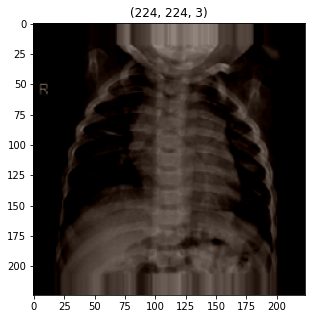

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


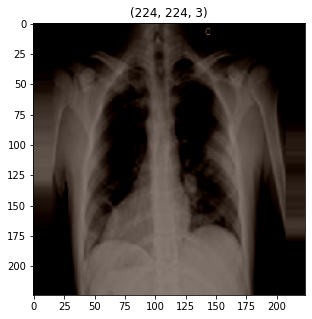

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


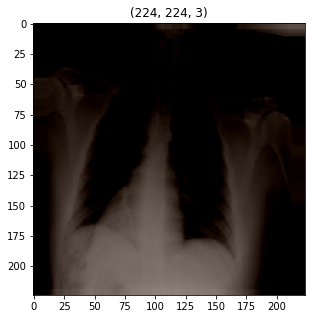

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


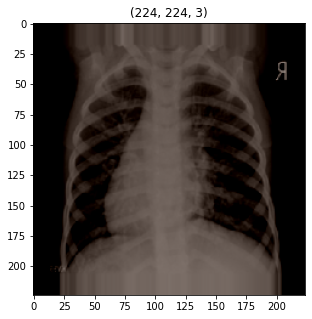

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


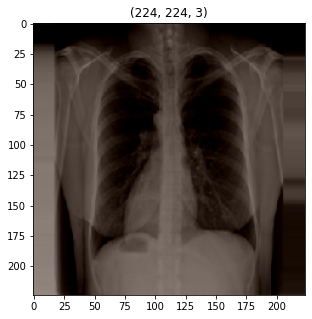

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


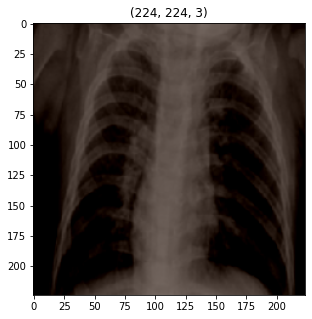

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


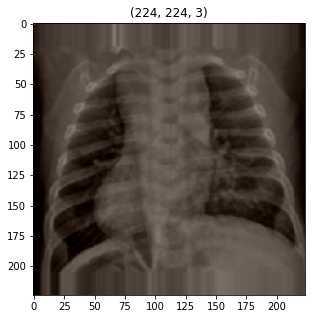

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


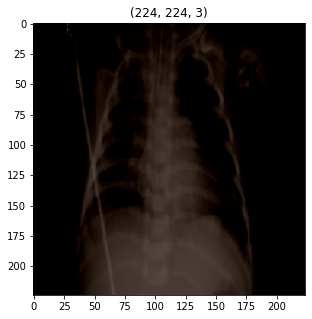

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


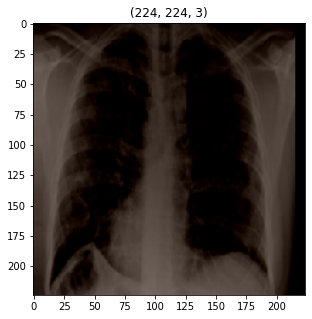

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


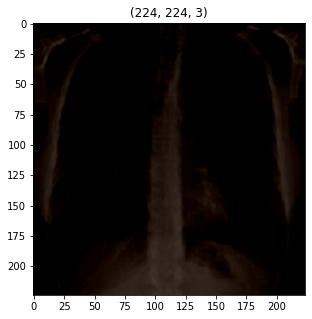

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


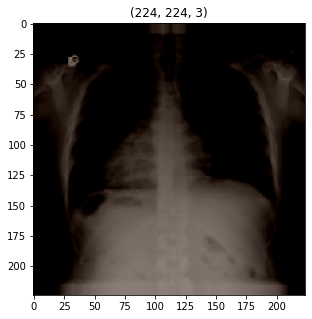

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


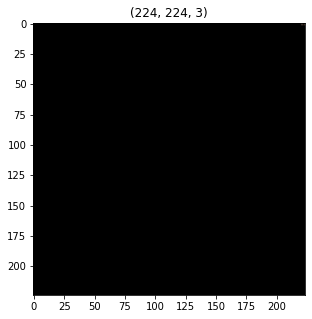

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


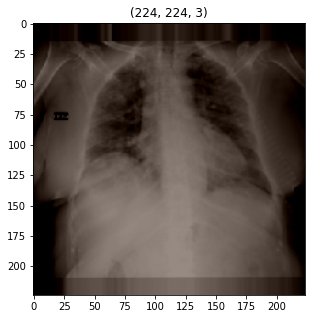

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


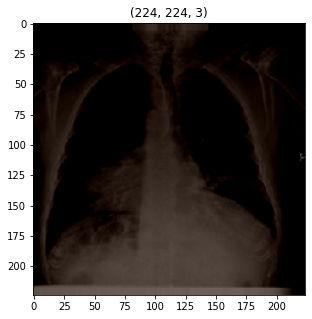

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


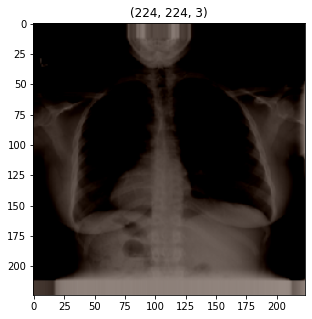

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


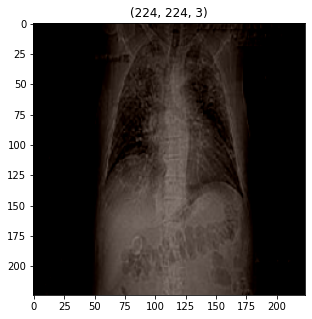

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


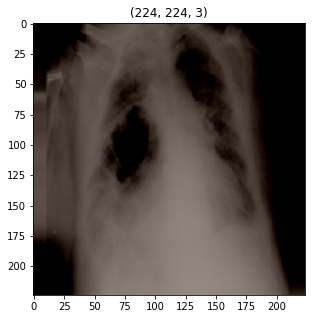

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


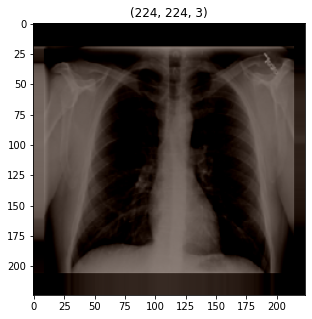

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


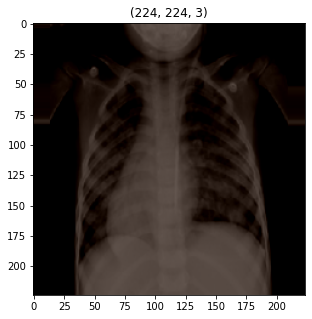

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


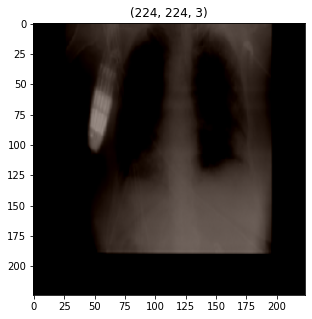

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


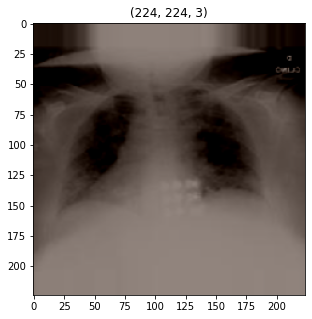

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


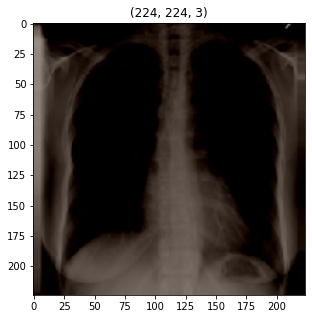

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


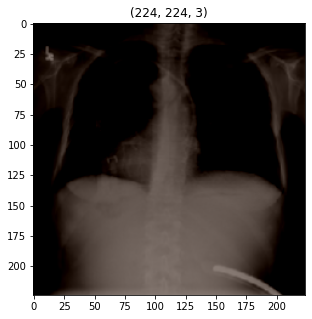

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


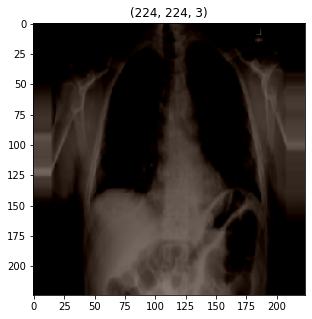

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


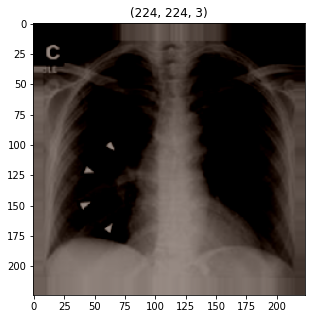

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


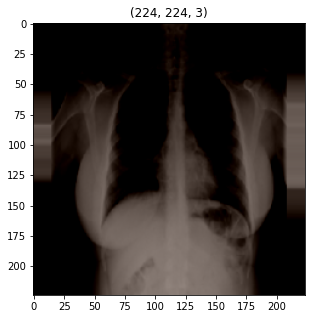

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


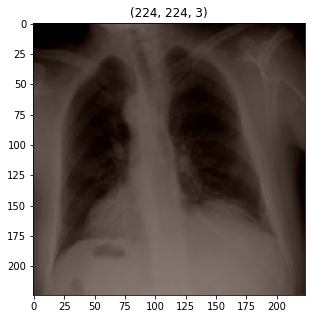

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


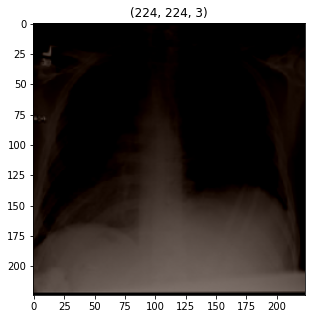

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


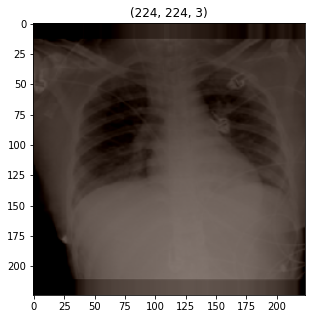

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


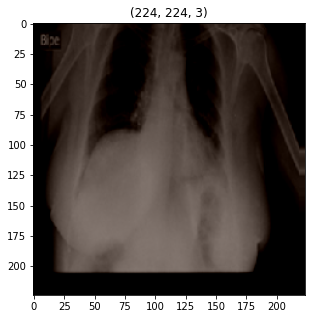

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


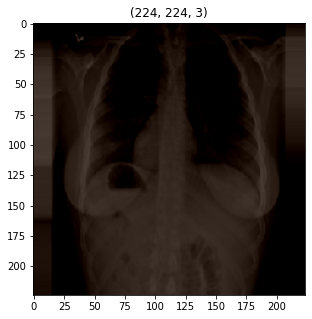

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


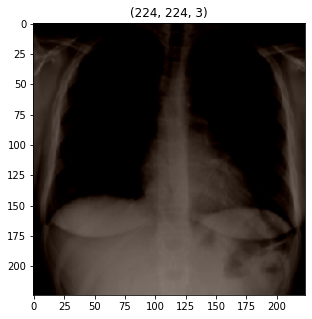

In [60]:
plotImages(t_img, label)

In [61]:
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten , Dense, Dropout , MaxPool2D

In [62]:
vgg = VGG16( input_shape=(224,224,3), include_top= False)

In [63]:
for layer in vgg.layers:           # Dont Train the parameters again 
  layer.trainable = False

In [64]:
x = Flatten()(vgg.output)
x = Dense(units=2 , activation='sigmoid', name = 'predictions' )(x)

model = Model(vgg.input, x)

In [65]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [66]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [67]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [68]:
hist = model.fit_generator(train, steps_per_epoch= 10, epochs= 15, validation_data= valid , validation_steps= 32, callbacks=[es,mc])

Epoch 1/15


2022-04-12 19:22:38.013636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 1.3835 - accuracy: 0.5563

2022-04-12 19:22:41.273363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_accuracy improved from -inf to 0.50694, saving model to bestmodel.h5
10/10 [==============================] - 11s 1s/step - loss: 1.3835 - accuracy: 0.5563 - val_loss: 1.0925 - val_accuracy: 0.5069
Epoch 2/15
10/10 [==============================] - ETA: 0s - loss: 0.7428 - accuracy: 0.6719
Epoch 2: val_accuracy improved from 0.50694 to 0.78968, saving model to bestmodel.h5
10/10 [==============================] - 11s 1s/step - loss: 0.7428 - accuracy: 0.6719 - val_loss: 0.4736 - val_accuracy: 0.7897
Epoch 3/15
10/10 [==============================] - ETA: 0s - loss: 0.5399 - accuracy: 0.7531
Epoch 3: val_accuracy improved from 0.78968 to 0.81845, saving model to bestmodel.h5
10/10 [==============================] - 11s 1s/step - loss: 0.5399 - accuracy: 0.7531 - val_loss: 0.4259 - val_accuracy: 0.8185
Epoch 4/15
10/10 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.8125
Epoch 4: val_accuracy improved from 0.81845 to 0.82738, saving model to bestmo

In [69]:
from keras.models import load_model
model = load_model("bestmodel.h5")

In [70]:
# Evaluate the model by getting its final loss and accuracy
model.evaluate(valid)

2022-04-12 19:25:01.617713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 8s 247ms/step - loss: 0.2507 - accuracy: 0.9058


[0.25071731209754944, 0.905754029750824]

# Accuracy using transfer learning on VGG16 is 91.34%

In [87]:
from keras.preprocessing import image

def get_img_array(img_path):
  """
  Input : Takes in image path as input 
  Output : Gives out Pre-Processed image
  """
  path = img_path
  img = image.load_img(path, target_size=(224,224,3))
  img = image.img_to_array(img)/255
  img = np.expand_dims(img , axis= 0 )
  
  return img

The given X-Ray image is of type = Covid

The chances of image being Covid is : 48.82562756538391 percent

The chances of image being Normal is : 19.492943584918976 percent


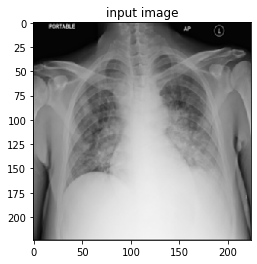

In [92]:
# path for that new image. ( you can take it either from google or any other scource)


path = "/Users/chaitanya/Desktop/Project_deep/all_images/Lung_Opacity-26.png"       # you can add any image path

#predictions: path:- provide any image from google or provide image from all image folder
img = get_img_array(path)

res = class_type[np.argmax(model.predict(img))]
print(f"The given X-Ray image is of type = {res}")
print()
print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} percent")
print()
print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} percent")

# to display the image  
plt.imshow(img[0], cmap = "gray")
plt.title("input image")
plt.show()

## Implementing Gradcam on the model

In [93]:
# this function is udes to generate the heat map of aan image
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [94]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [95]:
def save_and_display_gradcam(img_path , heatmap, cam_path="cam.jpg", alpha=0.4):
  

    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    
    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

#     tf.keras.preprocessing.image
    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))

In [96]:
# function that is used to predict the image type and the ares that are affected by covid


def image_prediction_and_visualization(path,last_conv_layer_name = "block5_conv3", model = model):
  """
  input:  is the image path, name of last convolution layer , model name
  output : returs the predictions and the area that is effected
  """
  
  img_array = get_img_array(path)

  heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()
  print()
  img = get_img_array(path)

  res = class_type[np.argmax(model.predict(img))]
  print(f"The given X-Ray image is of type = {res}")
  print()
  print(f"The chances of image being Covid is : {model.predict(img)[0][0]*100} %")
  print(f"The chances of image being Normal is : {model.predict(img)[0][1]*100} %")

  print()
  print("image with heatmap representing region on interest")

  # function call
  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()

# Predictions

## Image has been obtained from online resources.
## The prediction results are as  below.

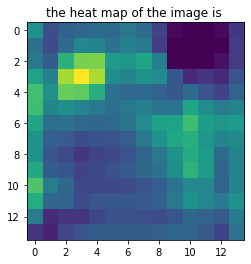


The given X-Ray image is of type = Covid

The chances of image being Covid is : 79.61650490760803 %
The chances of image being Normal is : 6.088206171989441 %

image with heatmap representing region on interest


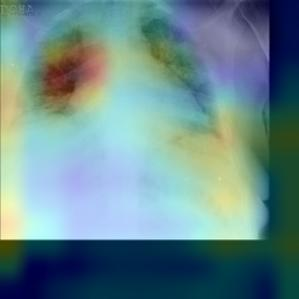


the original input image



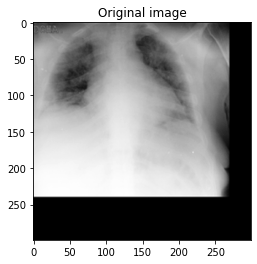

In [97]:
#predictions

path = "/Users/chaitanya/Downloads/COVID-ChestXray-15k-dataset/COVID/COVID-1184.png"

image_prediction_and_visualization(path)

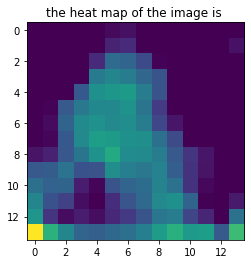


The given X-Ray image is of type = Covid

The chances of image being Covid is : 64.90503549575806 %
The chances of image being Normal is : 16.902828216552734 %

image with heatmap representing region on interest


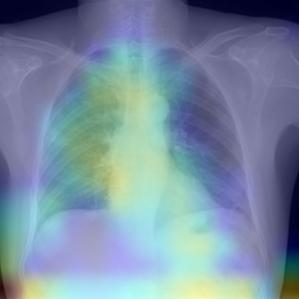


the original input image



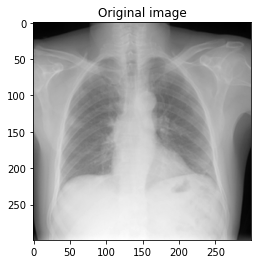

In [86]:
#predictions


path = "/Users/chaitanya/Desktop/Project_deep/base_dir/train_dir/covid/COVID-1904.png"

image_prediction_and_visualization(path)